# Country GDPs vs Greenhouse Gas Emissions
This project seeks to investigate the correlation in countries' GDPs with their annual greenhouse gas emissions. The goal of this project is to evaluate the economic implications of using fossil-fuels vs. renewable energy, and to assess how feasible it would be for developing countries to adopt net-zero emission policies while upholding their economic growth objectives.

# Data
**CO2 emissions per capita vs GDP per capita**: https://ourworldindata.org/grapher/co2-emissions-vs-gdp <br>
**Primary Energy Consumption**: https://ourworldindata.org/explorers/energy?tab=chart&country=USA~GBR~CHN~OWID_WRL~IND~BRA~ZAF&Total+or+Breakdown=Total&Energy+or+Electricity=Primary+energy&Metric=Annual+consumption

# Importing Libraries

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and Cleaning the Emission vs GDP dataset

In [130]:
df = pd.read_csv("Data/co2-emissions-vs-gdp.csv")
df

,Entity,Code,Year,Per capita CO2 emissions,GDP per capita,145446-annotations,"Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1949,0.001912,NaN,NaN,7663783.0,NaN
2,Afghanistan,AFG,1950,0.010871,1156.0,NaN,7752000.0,NaN
3,Afghanistan,AFG,1951,0.011684,1170.0,NaN,7840000.0,NaN
4,Afghanistan,AFG,1952,0.011542,1189.0,NaN,7936000.0,NaN
...,...,...,...,...,...,...,...,...
53089,Zimbabwe,ZWE,1899,NaN,NaN,NaN,1898216.0,NaN
53090,Zimbabwe,ZWE,1900,NaN,NaN,NaN,1911594.0,NaN
53091,Zimbabwe,ZWE,1901,NaN,NaN,NaN,1925066.0,NaN
53092,Zimbabwe,ZWE,1902,NaN,NaN,NaN,1938469.0,NaN


In [131]:
# can't use data points missing GDP per capita or per capita CO2 emissions, so drop those rows
df = df[df['Per capita CO2 emissions'].notna()]
df = df[df['GDP per capita'].notna()]

# drop 'annotations' column
df = df.drop(columns=['145446-annotations'])

# renaming columns to not have spaces
df = df.rename(columns={'Per capita CO2 emissions':'PerCapitaCO2Emissions', 'GDP per capita':'GDPPerCapita', 'Total population (Gapminder, HYDE & UN)':'TotalPop'})

In [132]:
# saving cleaned dataframe to csv
df.to_csv('Data/cleanedGDPEmissionData.csv', index = False)
df = pd.read_csv('Data/cleanedGDPEmissionData.csv')
df

,Entity,Code,Year,PerCapitaCO2Emissions,GDPPerCapita,TotalPop,Continent
0,Afghanistan,AFG,1950,0.010871,1156.00,7752000.0,NaN
1,Afghanistan,AFG,1951,0.011684,1170.00,7840000.0,NaN
2,Afghanistan,AFG,1952,0.011542,1189.00,7936000.0,NaN
3,Afghanistan,AFG,1953,0.013216,1240.00,8040000.0,NaN
4,Afghanistan,AFG,1954,0.013036,1245.00,8151000.0,NaN
...,...,...,...,...,...,...,...
13586,Zimbabwe,ZWE,2014,0.881181,1594.00,13587000.0,NaN
13587,Zimbabwe,ZWE,2015,0.880960,1560.00,13815000.0,Africa
13588,Zimbabwe,ZWE,2016,0.770831,1534.00,14030000.0,NaN
13589,Zimbabwe,ZWE,2017,0.719733,1582.37,14237000.0,NaN


# Exploratory Data Analysis

In [133]:
# lets look at the describe function to get a statistical overview of our data
df.describe()

,Year,PerCapitaCO2Emissions,GDPPerCapita,TotalPop
count,13591.000000,13591.000000,13591.000000,1.359100e+04
mean,1966.806048,3.787321,8620.796133,3.424790e+07
std,41.504854,6.499568,11491.944759,1.897451e+08
min,1800.000000,-2.674945,0.000000,2.500000e+04
25%,1952.000000,0.278963,1943.000000,3.043000e+06
50%,1976.000000,1.330766,4415.000000,7.251000e+06
75%,1998.000000,5.087487,10063.900000,2.148585e+07
max,2018.000000,101.021714,156299.000000,7.631091e+09


In [134]:
# the min per capita CO2 emissions seems to be negative, which doesn't mathematically make sense as Per Capita CO2 emissions = CO2 emissions / total population. I will investigate where these records are coming from.
df[df['PerCapitaCO2Emissions'] < 0]

,Entity,Code,Year,PerCapitaCO2Emissions,GDPPerCapita,TotalPop,Continent
6532,Kuwait,KWT,1952,-2.674945,47856.0,163000.0,NaN
6533,Kuwait,KWT,1953,-0.305333,49989.0,168000.0,NaN
10385,Saudi Arabia,SAU,1951,-0.108809,3784.0,3199000.0,NaN
10386,Saudi Arabia,SAU,1952,-0.052438,3937.0,3284000.0,NaN
10463,Senegal,SEN,1968,-0.020282,2389.0,4014000.0,NaN
13211,Venezuela,VEN,1930,-0.327070,2923.0,3562393.0,NaN
13212,Venezuela,VEN,1931,-0.071212,2904.0,3601636.0,NaN


In [135]:
# there are only 7 out of 13k data points with negative values, most likely due to a rounding error since most of them have very small values. 
# I will remove these as they are outliers that don't have any real significance due to being negative.
df = df[df['PerCapitaCO2Emissions'] >= 0]
df.describe()

,Year,PerCapitaCO2Emissions,GDPPerCapita,TotalPop
count,13584.000000,13584.000000,13584.000000,1.358400e+04
mean,1966.815665,3.789535,8616.862356,3.426423e+07
std,41.512427,6.500479,11484.011596,1.897926e+08
min,1800.000000,0.000110,0.000000,2.500000e+04
25%,1952.000000,0.279336,1942.982500,3.043500e+06
50%,1976.000000,1.333548,4416.675000,7.260308e+06
75%,1998.000000,5.092743,10062.765000,2.148823e+07
max,2018.000000,101.021714,156299.000000,7.631091e+09


Text(0, 0.5, 'Counts')

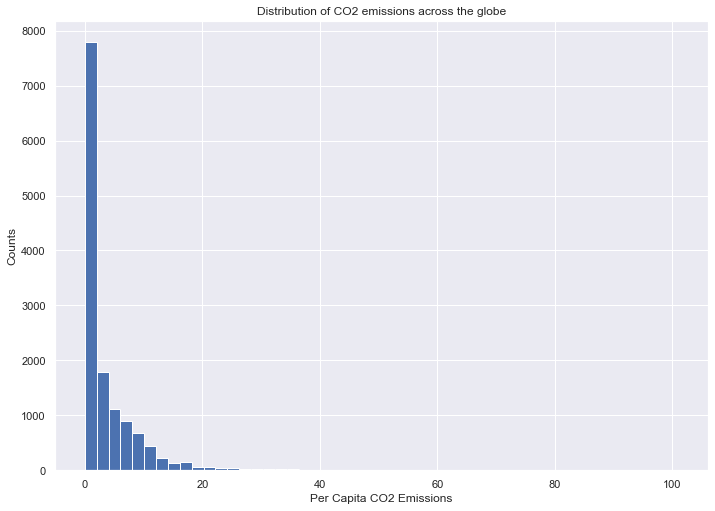

In [136]:
# lets take a closer look at the distribution of per capita CO2 emissions
hist = df['PerCapitaCO2Emissions'].hist(bins=50, range = [min(df['PerCapitaCO2Emissions']), max(df['PerCapitaCO2Emissions'])])
hist.set_title('Distribution of CO2 emissions across the globe')
hist.set_xlabel('Per Capita CO2 Emissions')
hist.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

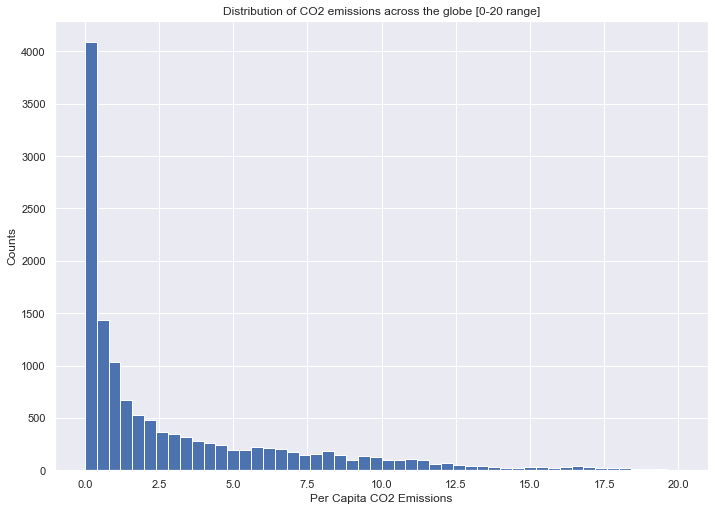

In [137]:
# We see a left-skewed distribution of per capita CO2 emissions, suggesting that over time the majority of countries have had per capita CO2 emissions between 0 and 10
hist = df['PerCapitaCO2Emissions'].hist(bins=50, range = [0, 20])
hist.set_title('Distribution of CO2 emissions across the globe [0-20 range]')
hist.set_xlabel('Per Capita CO2 Emissions')
hist.set_ylabel('Counts')

In [138]:
# Taking a closer look at this histogram between 0-20 shows the left-skew is even more pronounced in the 0-1 range, before tapering off towards the 10-12 range.

Text(0, 0.5, 'Counts')

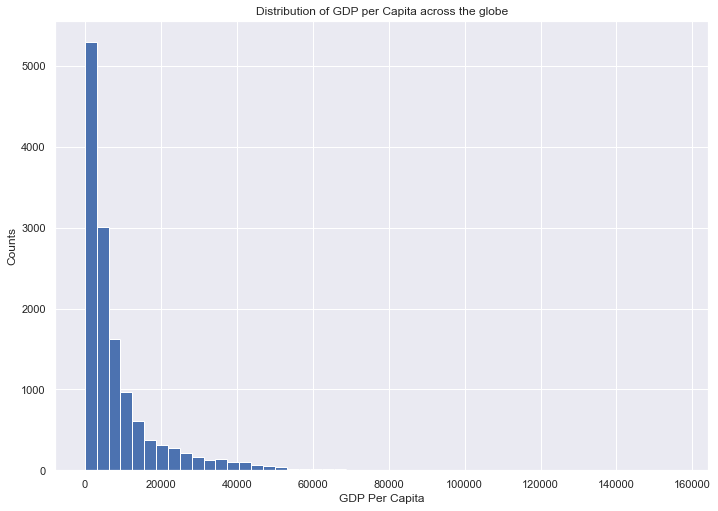

In [139]:
# Lets take a look at the distribution of GDP per capita.
hist = df['GDPPerCapita'].hist(bins=50)
hist.set_title('Distribution of GDP per Capita across the globe')
hist.set_xlabel('GDP Per Capita')
hist.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

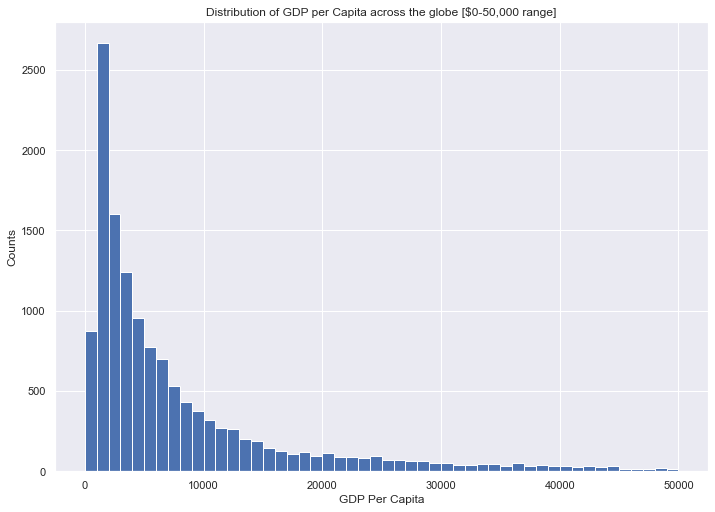

In [140]:
# taking another look scaling the x-axis:
histScaled = df['GDPPerCapita'].hist(bins=50, range = [0, 50000])
histScaled.set_title('Distribution of GDP per Capita across the globe [$0-50,000 range]')
histScaled.set_xlabel('GDP Per Capita')
histScaled.set_ylabel('Counts')

In [141]:
# There again seems to be a left-skew, now in the GDP data. 
# My assumption for these left-skews is that we are looking at historical data dating back to the 1800s, and thus there are many data points with smaller values.
df.columns

Index(['Entity', 'Code', 'Year', 'PerCapitaCO2Emissions', 'GDPPerCapita',
       'TotalPop', 'Continent'],
      dtype='object')

In [142]:
# Lets take a look at correlations between the values
corr = df[['PerCapitaCO2Emissions', 'GDPPerCapita', 'TotalPop']].corr()
corr

,PerCapitaCO2Emissions,GDPPerCapita,TotalPop
PerCapitaCO2Emissions,1.000000,0.672298,0.000100
GDPPerCapita,0.672298,1.000000,-0.003304
TotalPop,0.000100,-0.003304,1.000000


<AxesSubplot:>

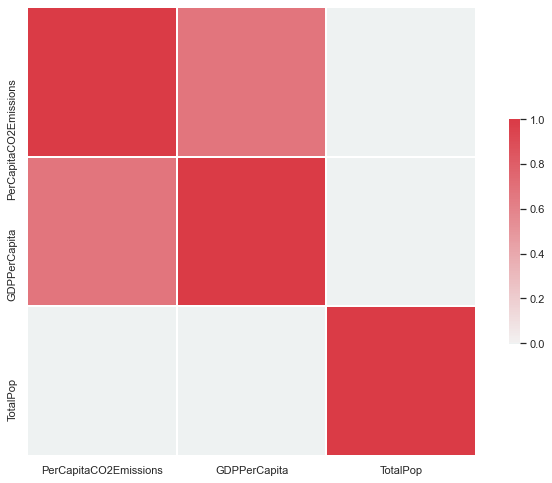

In [143]:
cmap = sns.diverging_palette(180, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center = 0, 
           square = True, linewidths=1, cbar_kws={"shrink": .5})

GDP per capita vs. Per Capita CO2 Emissions


<AxesSubplot:xlabel='GDPPerCapita', ylabel='PerCapitaCO2Emissions'>

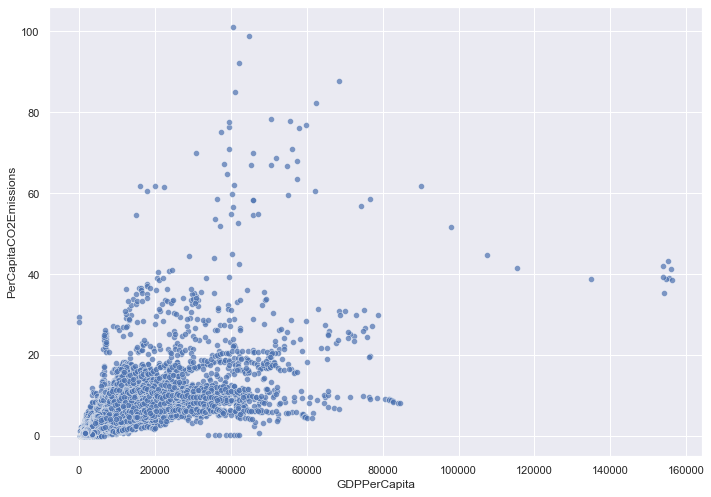

In [144]:
# According to this data, there is a 0.67 correlation between per capita CO2 emissions and GDP per capita. 
# Lets plot this relationship to assess the correlation visually:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
print('GDP per capita vs. Per Capita CO2 Emissions')
sns.scatterplot(data=df, x = 'GDPPerCapita', y = 'PerCapitaCO2Emissions', alpha = 0.7)

GDP per capita vs. Per Capita CO2 Emissions, Colored by continent


<AxesSubplot:xlabel='GDPPerCapita', ylabel='PerCapitaCO2Emissions'>

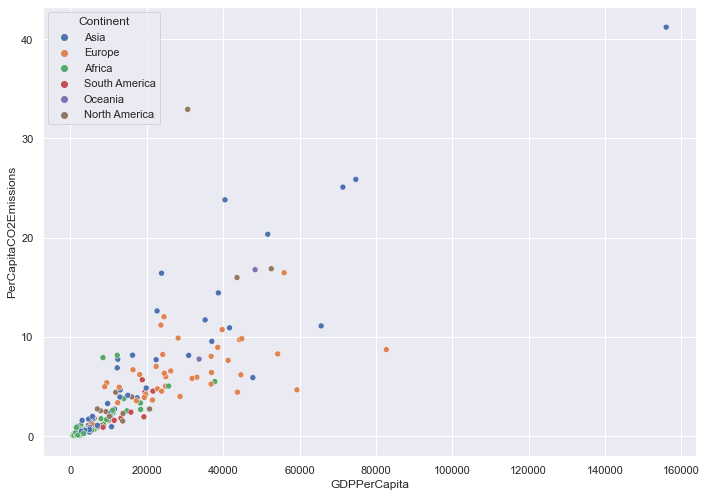

In [145]:
print('GDP per capita vs. Per Capita CO2 Emissions, Colored by continent')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df, x = 'GDPPerCapita', y = 'PerCapitaCO2Emissions', hue = 'Continent')

GDP per capita vs. Per Capita CO2 Emissions, Faceted by Continent


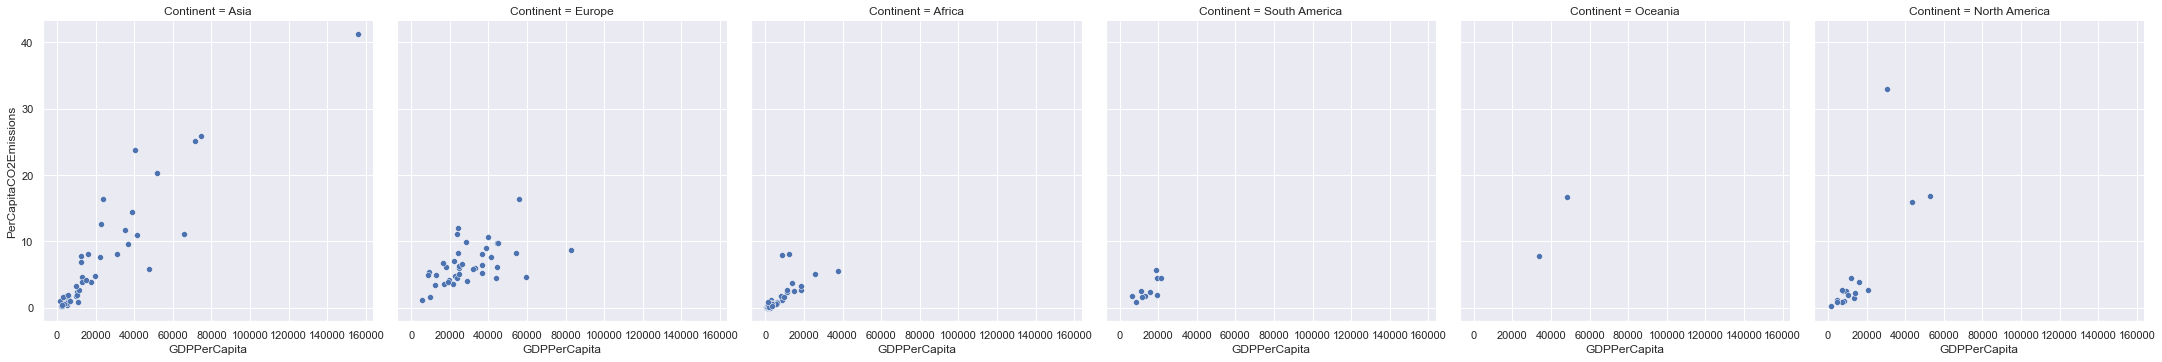

In [146]:
print('GDP per capita vs. Per Capita CO2 Emissions, Faceted by Continent')
sns.relplot(
        data = df, x = 'GDPPerCapita', 
        y = 'PerCapitaCO2Emissions',
        col='Continent', kind = "scatter",
)

<AxesSubplot:xlabel='GDPPerCapita', ylabel='PerCapitaCO2Emissions'>

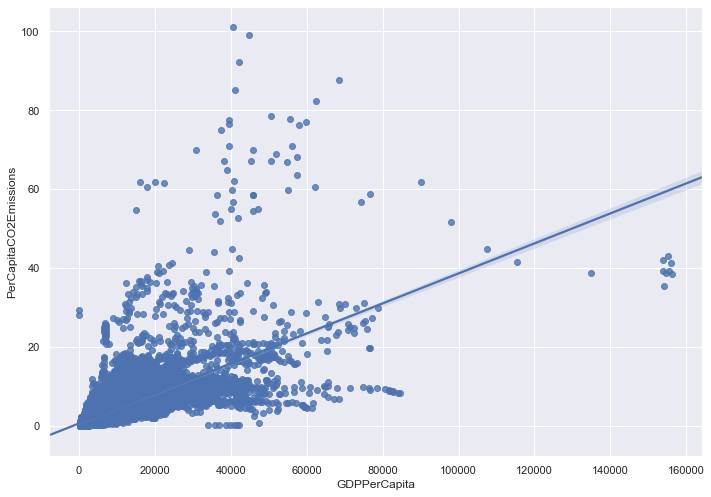

In [147]:
# We can see that across continents, there seems to be a positive linear correlation between GDP per capita and CO2 emissions per capita.
# Lets plot these with a regression line and a confidence interval of 68% to visualize this positive correlation even further:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(data = df, x = 'GDPPerCapita', 
            y = 'PerCapitaCO2Emissions', 
            ci=68, truncate=False, 
)

In [148]:
df[df['Entity'] == "Brazil"]

,Entity,Code,Year,PerCapitaCO2Emissions,GDPPerCapita,TotalPop,Continent
1487,Brazil,BRA,1901,0.113602,940.00,18513216.0,NaN
1488,Brazil,BRA,1902,0.132434,921.00,18923954.0,NaN
1489,Brazil,BRA,1903,0.126165,920.00,19341472.0,NaN
1490,Brazil,BRA,1904,0.132560,918.00,19762800.0,NaN
1491,Brazil,BRA,1905,0.138663,925.00,20187716.0,NaN
...,...,...,...,...,...,...,...
1600,Brazil,BRA,2014,2.583763,15258.00,202764000.0,NaN
1601,Brazil,BRA,2015,2.421915,15826.00,204472000.0,South America
1602,Brazil,BRA,2016,2.320701,13873.00,206163008.0,NaN
1603,Brazil,BRA,2017,2.331611,13951.60,207834000.0,NaN


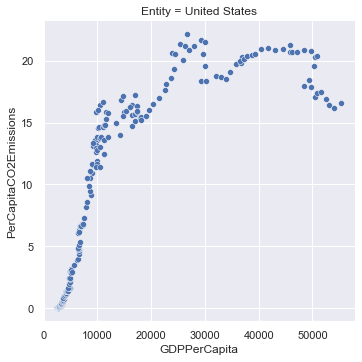

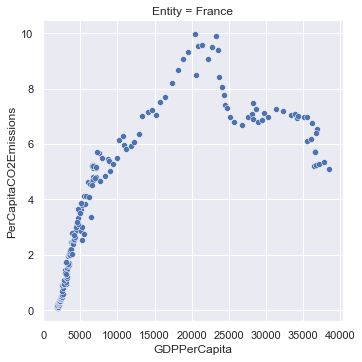

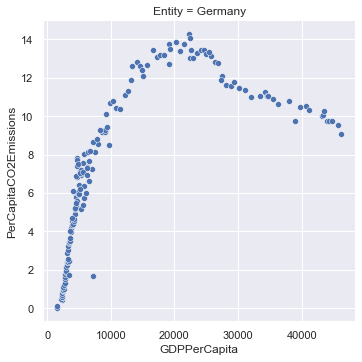

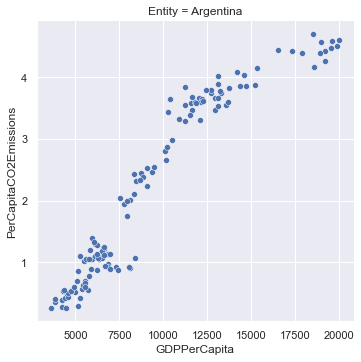

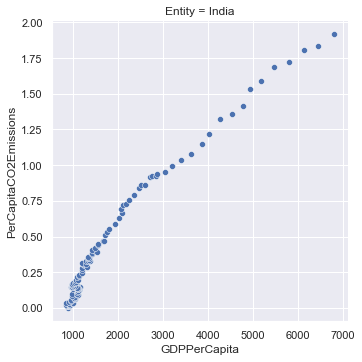

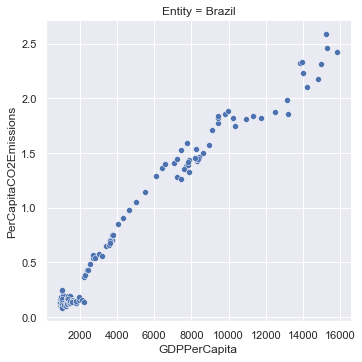

In [149]:
# Lets take a look at specific countries to see if there is a suggested non-linear correlation.
# We'll take a look at a couple developed and developing countries
countries = ['United States', 'France', 'Germany', 'Argentina', 'India', 'Brazil']

for country in countries:
    new_df = df[df['Entity'] == country]
    sns.relplot(data=new_df, x = 'GDPPerCapita', y = 'PerCapitaCO2Emissions', col = 'Entity')

At a glance, there seems to be an interesting distinction between developed vs. developing countries when it comes to the correlation of GDP to CO2 emissions: <br>
- Developed countries seem to follow a parabolic curve that peaks after a certain threshold of GDP, and then begins to decline. <br>
- Developing countries seem to follow a linear curve as GDP increases. <br>
I'm going to segment the dataset into "developing" and "developed" countries to see if this pattern is seen across the entire dataset.<br>
I will use the UN's classification of countries to make this distinction: https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf
https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf

In [150]:
developed = ['Austria','Belgium','Denmark','Finland','France','Germany','Greece','Ireland','Italy','Luxembourg','Netherlands','Portugal','Spain','Sweden','United Kingdom','Bulgaria','Croatia','Cyprus','Czech Republic','Estonia','Hungary'
             ,'Latvia','Lithuania','Malta','Poland','Romania','Slovakia','Slovenia','Iceland','Norway','Switzerland','Australia','Canada','Japan','New Zealand','United States','Canada','Japan','France','Germany','Italy','United Kingdom']

develop_col = []
# make a new column with category "developed". All countries above will receive a 1, and the rest receive 0
for country in df.Entity:
    if country in developed:
        develop_col.append(1)
    else:
        develop_col.append(0)

pd.set_option('mode.chained_assignment', None)
df['developed'] = develop_col
df[df['Entity'] == 'United States']        

,Entity,Code,Year,PerCapitaCO2Emissions,GDPPerCapita,TotalPop,Continent,developed
12846,United States,USA,1800,0.037169,2545.49,6801854.0,NaN,1
12847,United States,USA,1801,0.038577,2591.77,6933517.0,NaN,1
12848,United States,USA,1802,0.040955,2635.48,7067728.0,NaN,1
12849,United States,USA,1803,0.041194,2590.48,7204538.0,NaN,1
12850,United States,USA,1804,0.045401,2587.91,7343995.0,NaN,1
...,...,...,...,...,...,...,...,...
13060,United States,USA,2014,17.452747,51664.00,318672992.0,NaN,1
13061,United States,USA,2015,16.867569,52591.00,320878016.0,North America,1
13062,United States,USA,2016,16.383918,53015.00,323016000.0,NaN,1
13063,United States,USA,2017,16.160716,54007.77,325084992.0,NaN,1


Now that we have distinctions in developed vs. developing, we can plot these separately to look for general patterns

<AxesSubplot:xlabel='GDPPerCapita', ylabel='PerCapitaCO2Emissions'>

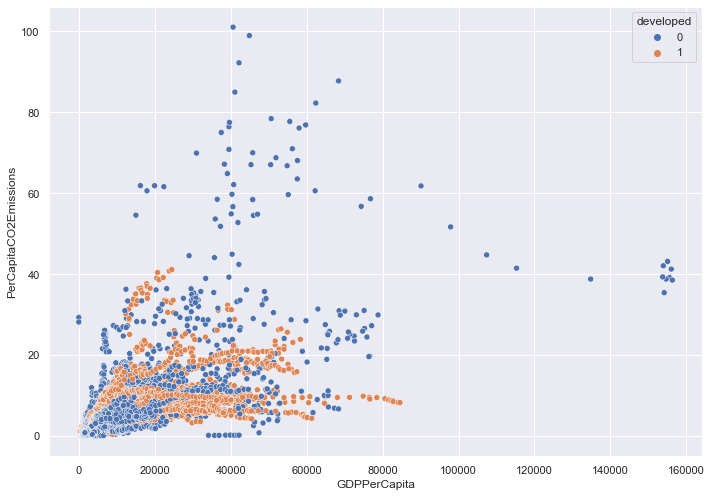

In [151]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df, x = 'GDPPerCapita', y = 'PerCapitaCO2Emissions', hue = 'developed')

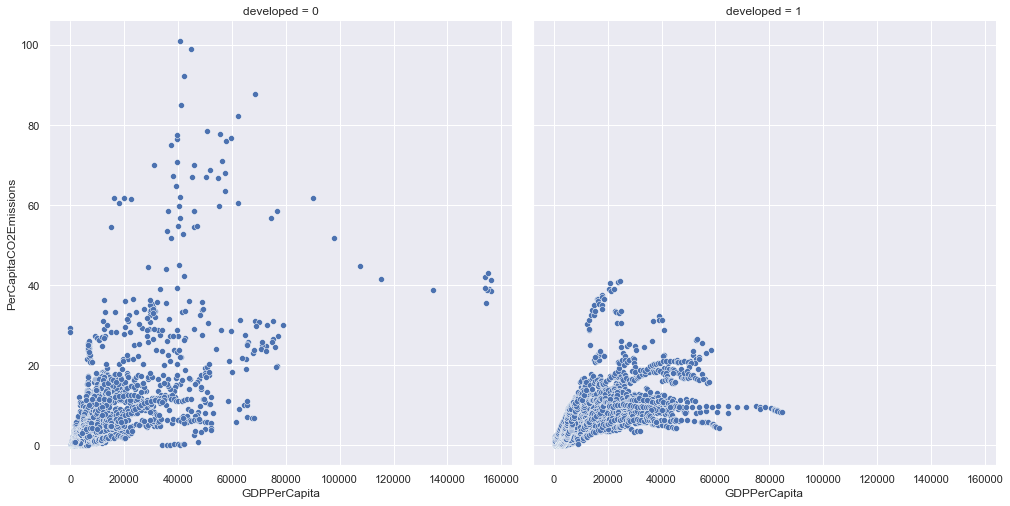

In [152]:
sns.relplot(
        data = df, x = 'GDPPerCapita', 
        y = 'PerCapitaCO2Emissions',
        col='developed', kind = "scatter",
        height = 7
)

<AxesSubplot:xlabel='GDPPerCapita', ylabel='PerCapitaCO2Emissions'>

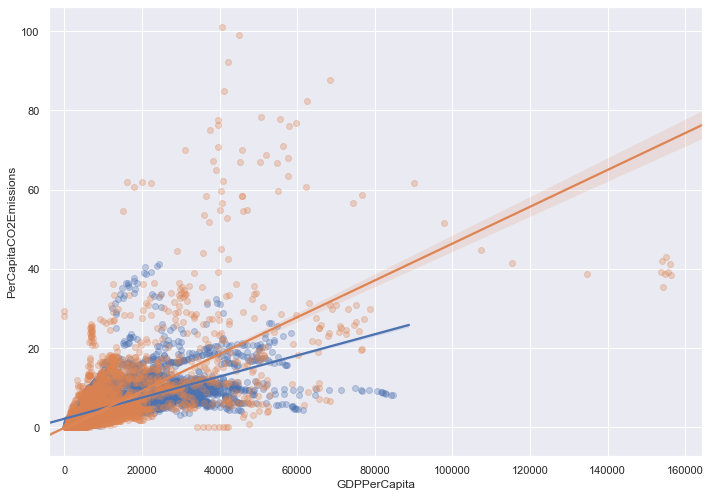

In [153]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(data = df[df['developed'] == 1], x = 'GDPPerCapita', 
            y = 'PerCapitaCO2Emissions', 
            ci=68, truncate=False, scatter_kws={'alpha':0.3} 
)
sns.regplot(data = df[df['developed'] == 0], x = 'GDPPerCapita', 
            y = 'PerCapitaCO2Emissions', 
            ci=68, truncate=False, scatter_kws={'alpha':0.3}
)

Taking a look at the regression lines above, there's already a pronounced difference in slope when comparing developed to developing countries in their relationships. <br>
Let's take a look at the correlations again between GDP per capita and Per Capita CO2 emissions between developed and developing countries:

In [154]:
developed = df[df['developed'] == 1]
developing = df[df['developed'] == 0]

developed_cor = developed[['PerCapitaCO2Emissions', 'GDPPerCapita', 'TotalPop']].corr()
developing_cor = developing[['PerCapitaCO2Emissions', 'GDPPerCapita', 'TotalPop']].corr()

print('Developed countries correlations')
developed_cor

Developed countries correlations


,PerCapitaCO2Emissions,GDPPerCapita,TotalPop
PerCapitaCO2Emissions,1.000000,0.627403,0.335409
GDPPerCapita,0.627403,1.000000,0.227992
TotalPop,0.335409,0.227992,1.000000


In [155]:
print('Developing countries correlations')
developing_cor

Developing countries correlations


,PerCapitaCO2Emissions,GDPPerCapita,TotalPop
PerCapitaCO2Emissions,1.000000,0.693314,-0.010776
GDPPerCapita,0.693314,1.000000,-0.010823
TotalPop,-0.010776,-0.010823,1.000000


Comparing the above correlation tables, we see that developed countries have a correlation between per capita co2 emissions and GDP per capita of 0.627, while developing countries see a correlation of 0.693. <br>
This suggests a linear model is more appropriate for developing countries, while a polynomial model might be better fit for developed countries. <br>
Below I'll fit a linear and 2nd-order curve to the developed countries' data:

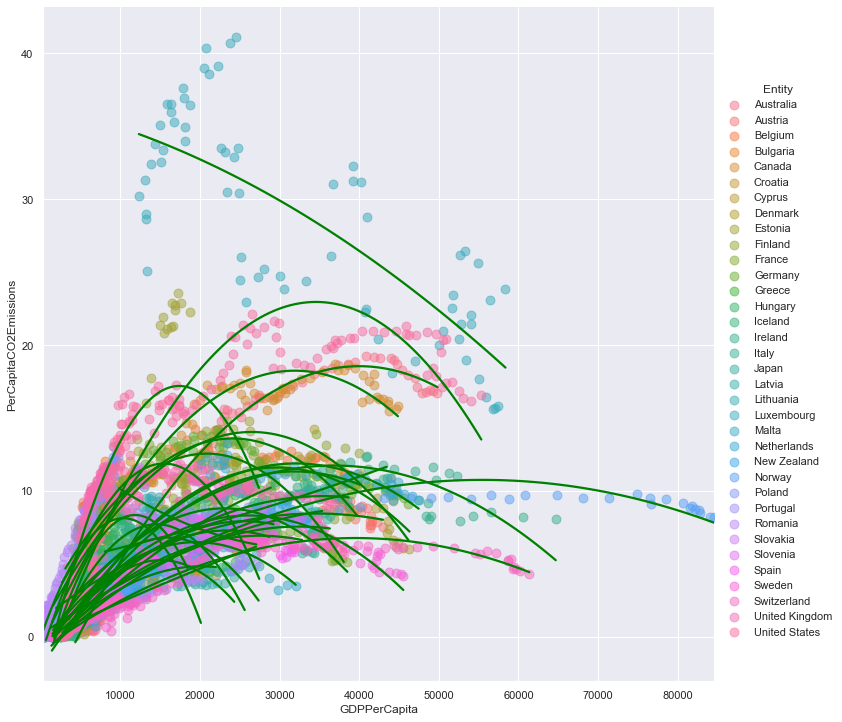

In [156]:
sns.lmplot(x='GDPPerCapita', y='PerCapitaCO2Emissions', data=developed,
           order=2, ci=None, height=10, scatter_kws={"s": 80, 'alpha':0.5}, hue = 'Entity', line_kws={'color': 'green'});

The graph above clearly shows that for the most part, a developed country's per capita CO2 emission will read a peak and begin to decrease as GDP per capita increases. <br>
This is a very interesting characteristic of developed countries, which could be explained by many confounding variables that I will explore later. 

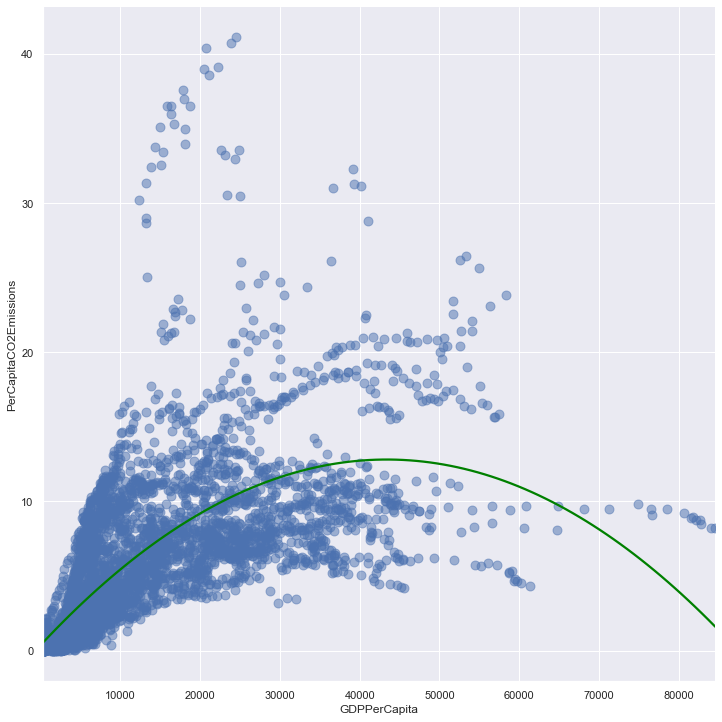

In [157]:
sns.lmplot(x='GDPPerCapita', y='PerCapitaCO2Emissions', data=developed,
           order=2, ci=None, height=10, scatter_kws={"s": 80, 'alpha':0.5}, line_kws={'color': 'green'});

When distinguishing all developed countries' data at once, the green curve above signifies the overall parabolic fit of the data. <br>
Let's attempt to fit the developing countries' data with a parabola as well:

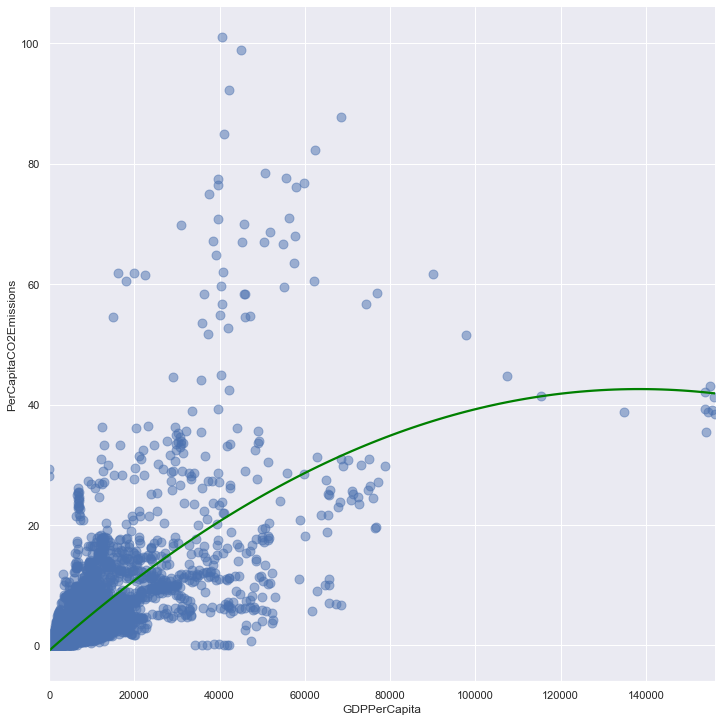

In [158]:
sns.lmplot(x='GDPPerCapita', y='PerCapitaCO2Emissions', data=developing,
           order=2, ci=None, height=10, scatter_kws={"s": 80, 'alpha':0.5}, line_kws={'color': 'green'});

The curve above follows a very different path for developing countries, resembling a logarithmic curve. <br>
This presents an interesting insight that most developing countries have not reached an apex where an increase GDP per capita leads to a decrease in CO2 emission per capita. <br>
This is unlike developed countries, which seem to have reached an apex and have seen increases in GDP per capita lead to decreases in CO2 emissions per capita.

# Model Building 
I will now look into some regression models and see the predictive accuracy of using GDP per capita to estimate Per Capita CO2 emissions

In [159]:
# choose relevant columns
df.columns
df_model = df[['PerCapitaCO2Emissions', 'GDPPerCapita', 'developed']]
df_model
# get dummy data
df_dum = pd.get_dummies(df_model)
df_dum
# train test split
from sklearn.model_selection import train_test_split
X = df_dum.drop('PerCapitaCO2Emissions', axis=1)
y = df_dum.PerCapitaCO2Emissions

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [160]:
# multiple linear regression
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PerCapitaCO2Emissions   R-squared:                       0.452
Model:                               OLS   Adj. R-squared:                  0.452
Method:                    Least Squares   F-statistic:                     5610.
Date:                   Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                           12:54:58   Log-Likelihood:                -40612.
No. Observations:                  13584   AIC:                         8.123e+04
Df Residuals:                      13581   BIC:                         8.125e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4400      0.056      7.844      0.000       0.330       0.550
GDPPerCapita     0.0004   3.73e-06    101.294      0.000       0.000       0.000
developed        0.2901      0.091      3.203      0.001       0.113       0.468
==============================================================================
Omnibus:                    15120.522   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2194502.910
Skew:                           5.563   Prob(JB):                         0.00
Kurtosis:                      64.265   Cond. No.                     3.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)
mean_err_linear = np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv = 3))

linear regression error: -2.282569
lasso regression error: -2.299955


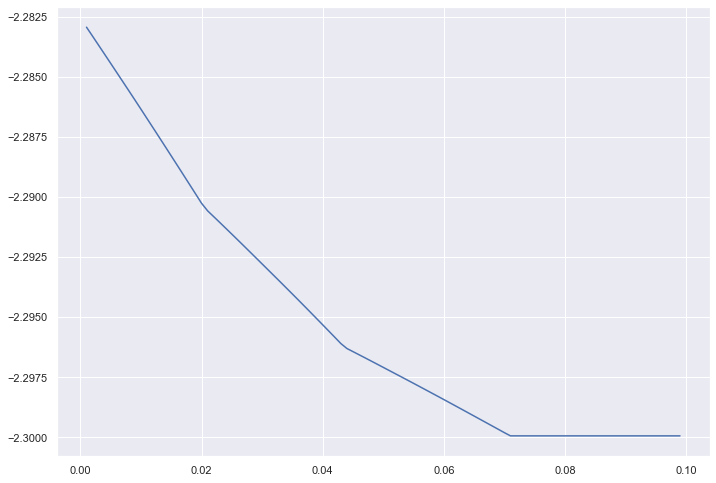

In [162]:
# lasso legression
lm_l = Lasso()
mean_err_lasso = np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv = 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/1000)
    lml = Lasso(alpha = (i / 1000))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring='neg_mean_absolute_error', cv = 3)))
    
plt.plot(alpha,error)

# it seems as though alpha = 0 is the best option, so we'll go with that
print('linear regression error: %f' % mean_err_linear)
print('lasso regression error: %f' % mean_err_lasso)

In [163]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
mean_error_rf = np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv = 3))
print('random forrest error: %f' % mean_error_rf)

random forrest error: -2.313823


In [164]:
# test ensembles
tpred_lm = lm.predict(X_test)
lml.fit(X_train, y_train)
tpred_lml = lml.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, tpred_lm))
print(mean_absolute_error(y_test, tpred_lml))

print(mean_absolute_error(y_test, (tpred_lml+tpred_lm)/2))

2.2109043492366824
2.226784972850331
2.2185050882188824


In [165]:
# pickling the linear model which perfomed the bets 
import pickle
pickl = {'model': lm}
pickle.dump(pickl, open('model_file' + '.p', 'wb'))

In [166]:
file_name = 'model_file.p'
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']
    
model.predict(X_test.iloc[1,:].values.reshape(1,-1))


array([0.98698611])

# TODO
- There may be further correlation between GDP and energy consumption, as well as GDP and gross fixed capital (https://www.jois.eu/files/07_Kasperowicz.pdf)
- Could develop a model that incorporates these variables further 

In [167]:
# load energy consumption data
energydf = pd.read_csv('Data/energy.csv')
energydf = energydf[energydf['Primary energy consumption (TWh)'].notna()]
energydf = energydf.rename(columns={'Primary energy consumption (TWh)': 'PrimaryEnergyConsumpTWh'})

In [168]:
# perform a left join of energydf on previous df
newdf = pd.merge(df, energydf, on=['Entity', 'Year', 'Code'], how='left')

In [172]:
newdf = newdf[newdf['PrimaryEnergyConsumpTWh'].notna()]
newdf

,Entity,Code,Year,PerCapitaCO2Emissions,GDPPerCapita,TotalPop,Continent,developed,PrimaryEnergyConsumpTWh
30,Afghanistan,AFG,1980,0.131502,1019.0,13357000.0,NaN,0,7.773
31,Afghanistan,AFG,1981,0.150222,1144.0,13172000.0,NaN,0,8.732
32,Afghanistan,AFG,1982,0.162611,1270.0,12883000.0,NaN,0,9.135
33,Afghanistan,AFG,1983,0.200990,1347.0,12538000.0,NaN,0,11.006
34,Afghanistan,AFG,1984,0.231238,1337.0,12204000.0,NaN,0,11.056
...,...,...,...,...,...,...,...,...,...
13577,Zimbabwe,ZWE,2012,0.583977,1604.0,13115000.0,NaN,0,55.756
13578,Zimbabwe,ZWE,2013,0.870154,1604.0,13350000.0,NaN,0,56.081
13579,Zimbabwe,ZWE,2014,0.881181,1594.0,13587000.0,NaN,0,56.084
13580,Zimbabwe,ZWE,2015,0.880960,1560.0,13815000.0,Africa,0,55.642


In [173]:
# looking at correlations with energy consumption
corr = newdf[['PerCapitaCO2Emissions', 'GDPPerCapita', 'TotalPop','developed','PrimaryEnergyConsumpTWh']].corr()
corr

,PerCapitaCO2Emissions,GDPPerCapita,TotalPop,developed,PrimaryEnergyConsumpTWh
PerCapitaCO2Emissions,1.000000,0.653893,-0.026427,0.289762,0.098412
GDPPerCapita,0.653893,1.000000,-0.030734,0.495644,0.112016
TotalPop,-0.026427,-0.030734,1.000000,-0.044095,0.873894
developed,0.289762,0.495644,-0.044095,1.000000,0.079408
PrimaryEnergyConsumpTWh,0.098412,0.112016,0.873894,0.079408,1.000000


<AxesSubplot:>

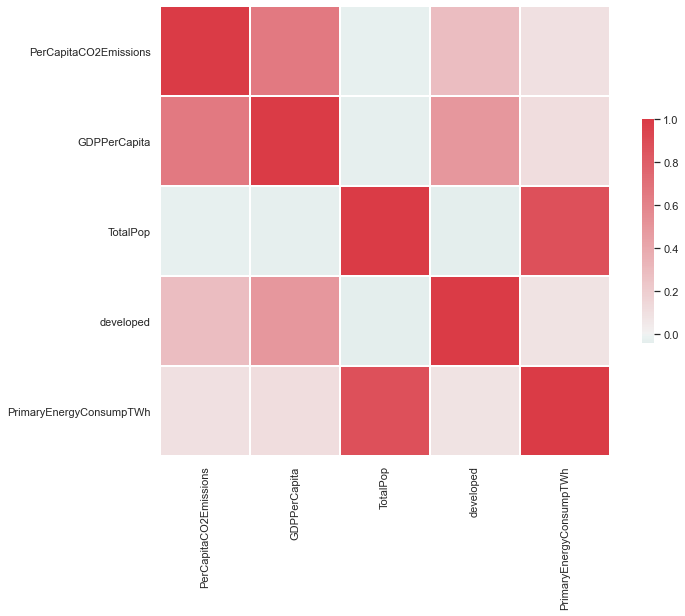

In [174]:
cmap = sns.diverging_palette(180, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center = 0, 
           square = True, linewidths=1, cbar_kws={"shrink": .5})